<a href="https://colab.research.google.com/github/kussy29/machine_learning/blob/main/lab12_nlp_towards_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Is a *queen* really just a *king*, minus a *man*, plus a *woman*?**

--------------



In class, we dealt with **embeddings** trained for **sentiment classification**. These embeddings are optimized to separate *positive* from *negative* expressions and **do not encode deeper semantic information**.

However, in modern natural language processing, there exist other embeddings — such as those from **BERT**, **word2vec**, or **GloVe** — that **do capture semantic structure**. These models are trained on large corpora, and their embeddings often allow for meaningful **vector arithmetic**, like the famous:

```
embedding("king") - embedding("man") + embedding("woman") ≈ embedding("queen")
```

This homework explores **semantic vector relationships** using such pretrained embeddings.

## **The Objective**

Your task is to:

1. Construct semantic classes of word pairs.
2. Visualize them using PCA.
3. Explore arithmetic operations in embedding space.

## **Tasks & Deliverables**

### 1. **Semantic Pair Classes**

- You must gather **at least 10 classes** of semantically related word pairs.
- Each class must contain **at least 5 pairs**.
- That gives a **minimum total of 100 unique words** (10 classes x 5 pairs x 2 words per pair).

Two example classes:

**Class 1: Gender**

- (king, queen)
- (man, woman)
- (doctor, nurse)
- (prince, princess)
- *(you must add one more)*

**Class 2: Verb tense (past tense)**

- (bring, brought)
- (get, got)
- (like, liked)
- *(you must add two more)*

**Your job:**

- Invent or search for **at least 10 such classes**, including the examples above.
- Each class must be conceptually coherent.
- Other examples: singular/plural, country/capital, comparative/superlative, tool/user, job/object, etc.

### 2. **Global PCA (Across All Words)**

- Use PCA to reduce the **entire set of 100 word embeddings** to 2D, and plot it.
- Plot the additional **10 separate charts**, one for each class.
  - Each chart should display only the 10 words (5 pairs) of the given class.
- Points should be labeled with the words themselves.

### 3. **Local PCA (Per Class)**

- For each class (10 total), perform PCA **only** on the 10 words of that class.
- Plot these class-wise PCA visualizations as separate charts.
- Again, points should be labeled with the words.

**Total: 21 charts**
(1 global plot with 100 words + 10 global-space class plots + 10 local PCA class plots)

Charts should be presented in a self-explanatory manner with clear labels.

### 4. **Embedding Arithmetic**

For each class, choose **one example pair** (e.g., (king, queen)) and perform the operation:

```
embedding(B) - embedding(A) + embedding(C)
```

Where A and B form a known pair, and C is another base word.
For example:

```
embedding("king") - embedding("man") + embedding("woman")
```

* For each such result vector, find the **5 closest word embeddings** (using cosine similarity or Euclidean distance).
* Print the top 5 neighbors **with their distances**.
* Do this **once per class** (i.e., 10 times).

This will make it possible to verify if
 ```
embedding("queen") ≈ embedding("king") - embedding("man") + embedding("woman")
```
for the *gender*-related class.


### 5. **Discussion**

* Analyze and interpret your 21 plots.
* Discuss whether the vector relationships are preserved.
* Does PCA capture semantic differences?
* Are the closest words from the arithmetic meaningful?
* What kinds of relationships are captured, and what are not?
* Are some classes better behaved than others?


### 6. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


## Acknowledgments

*This homework assignment was inspired by an idea from my master's student **Andrzej Małek**, to whom I would like to express my thanks.*



**Class 1: Gender** (man - woman)


*   King - Queen
*   Man - Woman
*   Doctor - Nurse
*   Prince - Princess
*   Actor - Actress
*   Uncle - Aunt

**Class 2: Past tense** (present or now - past)


*   bring - brought
*   get - got
*   like - liked
*   give - gave
*   leave - left
*   can - could

**Class 3: Capital** (country - capital)

*   Poland - Warsaw
*   USA - Washington
*   Washington - Olympia
*   Turkey - Ankara
*   Liechtenstein - Vaduz
*   Bavaria - Munich

**Class 4: Antonims** (just check if they are opposite by multiplying whole vector by -1)

*   pretty - ugly
*   happy - sad
*   noise - silence
*   wealth - poverty
*   quickly - slowly
*   left - right

**Class 5: Adjective** (noun - adjective)

*  Poland - polish
*  wealth - wealthy
*  happiness - happy
*  creativity - creative
*  beauty - beautiful
*  fun - funny

**Class 6: Substitutes** (just check if they are similar to each other)

*  Orange - tangerine
*  Butter - margarine
*  Coffee - Tea
*  Coca-cola - Pepsi
*  Sandwich - Burger

**Class 7 - diminutives**(big - small)

*  dear - darling
*  Charles - Charlie
*  duck - duckling
*  dog - doggie
*  cat - kitty

**Class 8 - Child** (parent or human - child)

*  Dog - puppy
*  Cow - calf
*  cat - kitten
*  Horse - foal
*  Swan - cygnet

**Class 9 - Meat** (animal - meat)

*  pig - pork
*  cow - beef
*  sheep - mutton
*  deer - venison
*  bird - poultry

**Class 10 - Food** (ingredient - food)

*  potato - crisps
*  lettuce - salad
*  pork - sausage
*  wheat - bread
*  avocado - guacamole


In [ ]:
!pip install --upgrade numpy scipy gensim

# for this to work you need to reset kernel
import os
os._exit(00)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 936.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 906.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you

In [1]:
import gensim.downloader as api
#another option: word2vec-google-news-300
model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [29]:
gender=['king','queen','man','woman','doctor','nurse','prince','princess','actor','actress','uncle','aunt']
past=['bring','brought','get','got','like','liked','give','gave','leave','left','can','could']
capital=['poland','warsaw','usa','washington','olympia','turkey','ankara','liechtenstein','vaduz','bavaria','munich'] # we can add washington, d.c.
antonyms=['pretty','ugly','happy','sad','noise','silence','wealth','poverty','quickly','slowly','left','right']
adjective=['poland','polish','wealth','wealthy','happiness','happy','creativity','creative','beauty','beautiful','fun','funny']
substitutes=['orange','tangerine','butter','margarine','coffee','tea','coca-cola','pepsi','sandwich','burger']
diminutives=['dear','darling','charles','charlie','duck','duckling','dog','doggie','cat','kitty']
child=['dog','puppy','cow','calf','cat','kitten','horse','foal','swan','cygnet']
meat=['pig','pork','cow','beef','sheep','mutton','deer','venison','bird','poultry']
food=['potato','crisps','lettuce','salad','pork','sausage','wheat','bread','avocado','guacamole']
all_words=set(gender+past+capital+antonyms+adjective+substitutes+diminutives+child+meat+food)
print(f'Number of words {len(all_words)}')

Number of words 101


In [3]:
vector=model['d.c']
model.most_similar('washington')

[('d.c.', 0.7569834589958191),
 ('u.s.', 0.7299554944038391),
 ('bush', 0.729238748550415),
 ('states', 0.7253372669219971),
 ('york', 0.7243969440460205),
 ('united', 0.7190695405006409),
 ('clinton', 0.7139398455619812),
 ('administration', 0.7079502940177917),
 ('chicago', 0.6635971665382385),
 ('officials', 0.6601542830467224)]

In [30]:
gender_vectors=[]
for word in gender:
  gender_vectors.append(model[word])
past_vectors=[]
for word in past:
  past_vectors.append(model[word])
capital_vectors=[]
for word in capital:
  #try:
  capital_vectors.append(model[word])
  #except:
  # capital_vectors.append(model['washington']+model['d.c.'])
antonyms_vectors=[]
for word in antonyms:
  antonyms_vectors.append(model[word])
adjective_vectors=[]
for word in adjective:
  adjective_vectors.append(model[word])
substitutes_vectors=[]
for word in substitutes:
  substitutes_vectors.append(model[word])
diminutives_vectors=[]
for word in diminutives:
  diminutives_vectors.append(model[word])
child_vectors=[]
for word in child:
  child_vectors.append(model[word])
meat_vectors=[]
for word in meat:
  meat_vectors.append(model[word])
food_vectors=[]
for word in food:
  food_vectors.append(model[word])
all_words_vectors=[]
for word in all_words:
  #try:
  all_words_vectors.append(model[word])
  #except:
  #  all_words_vectors.append(model['washington']+model['d.c.'])



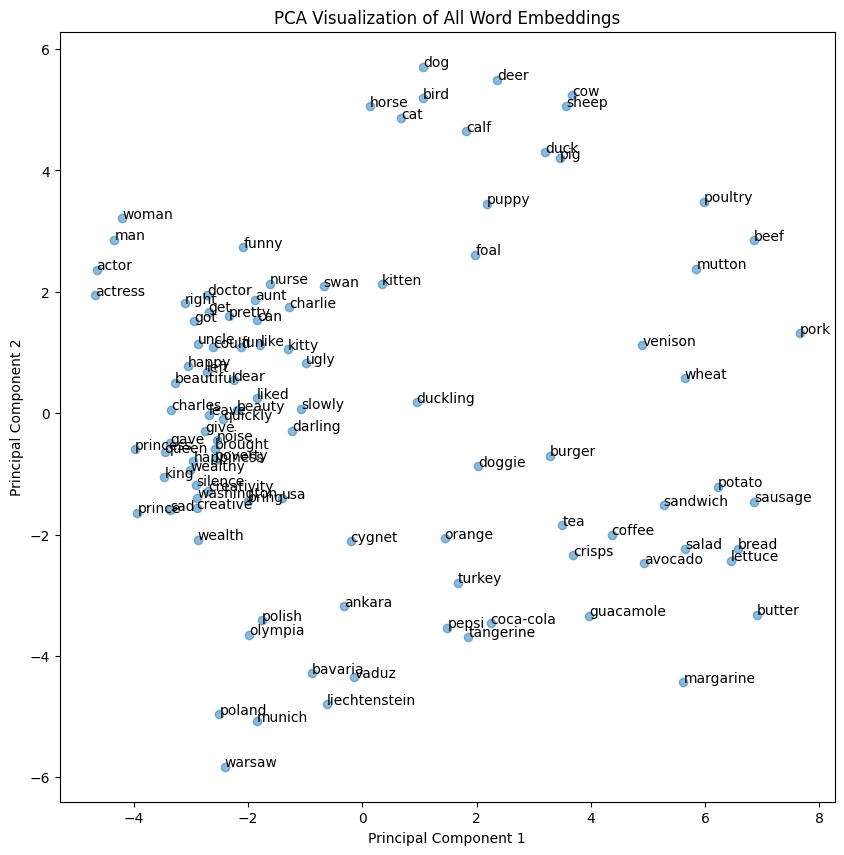

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

n_components=2
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_words_vectors)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)



plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
for i, word in enumerate(all_words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of All Word Embeddings')
plt.show()

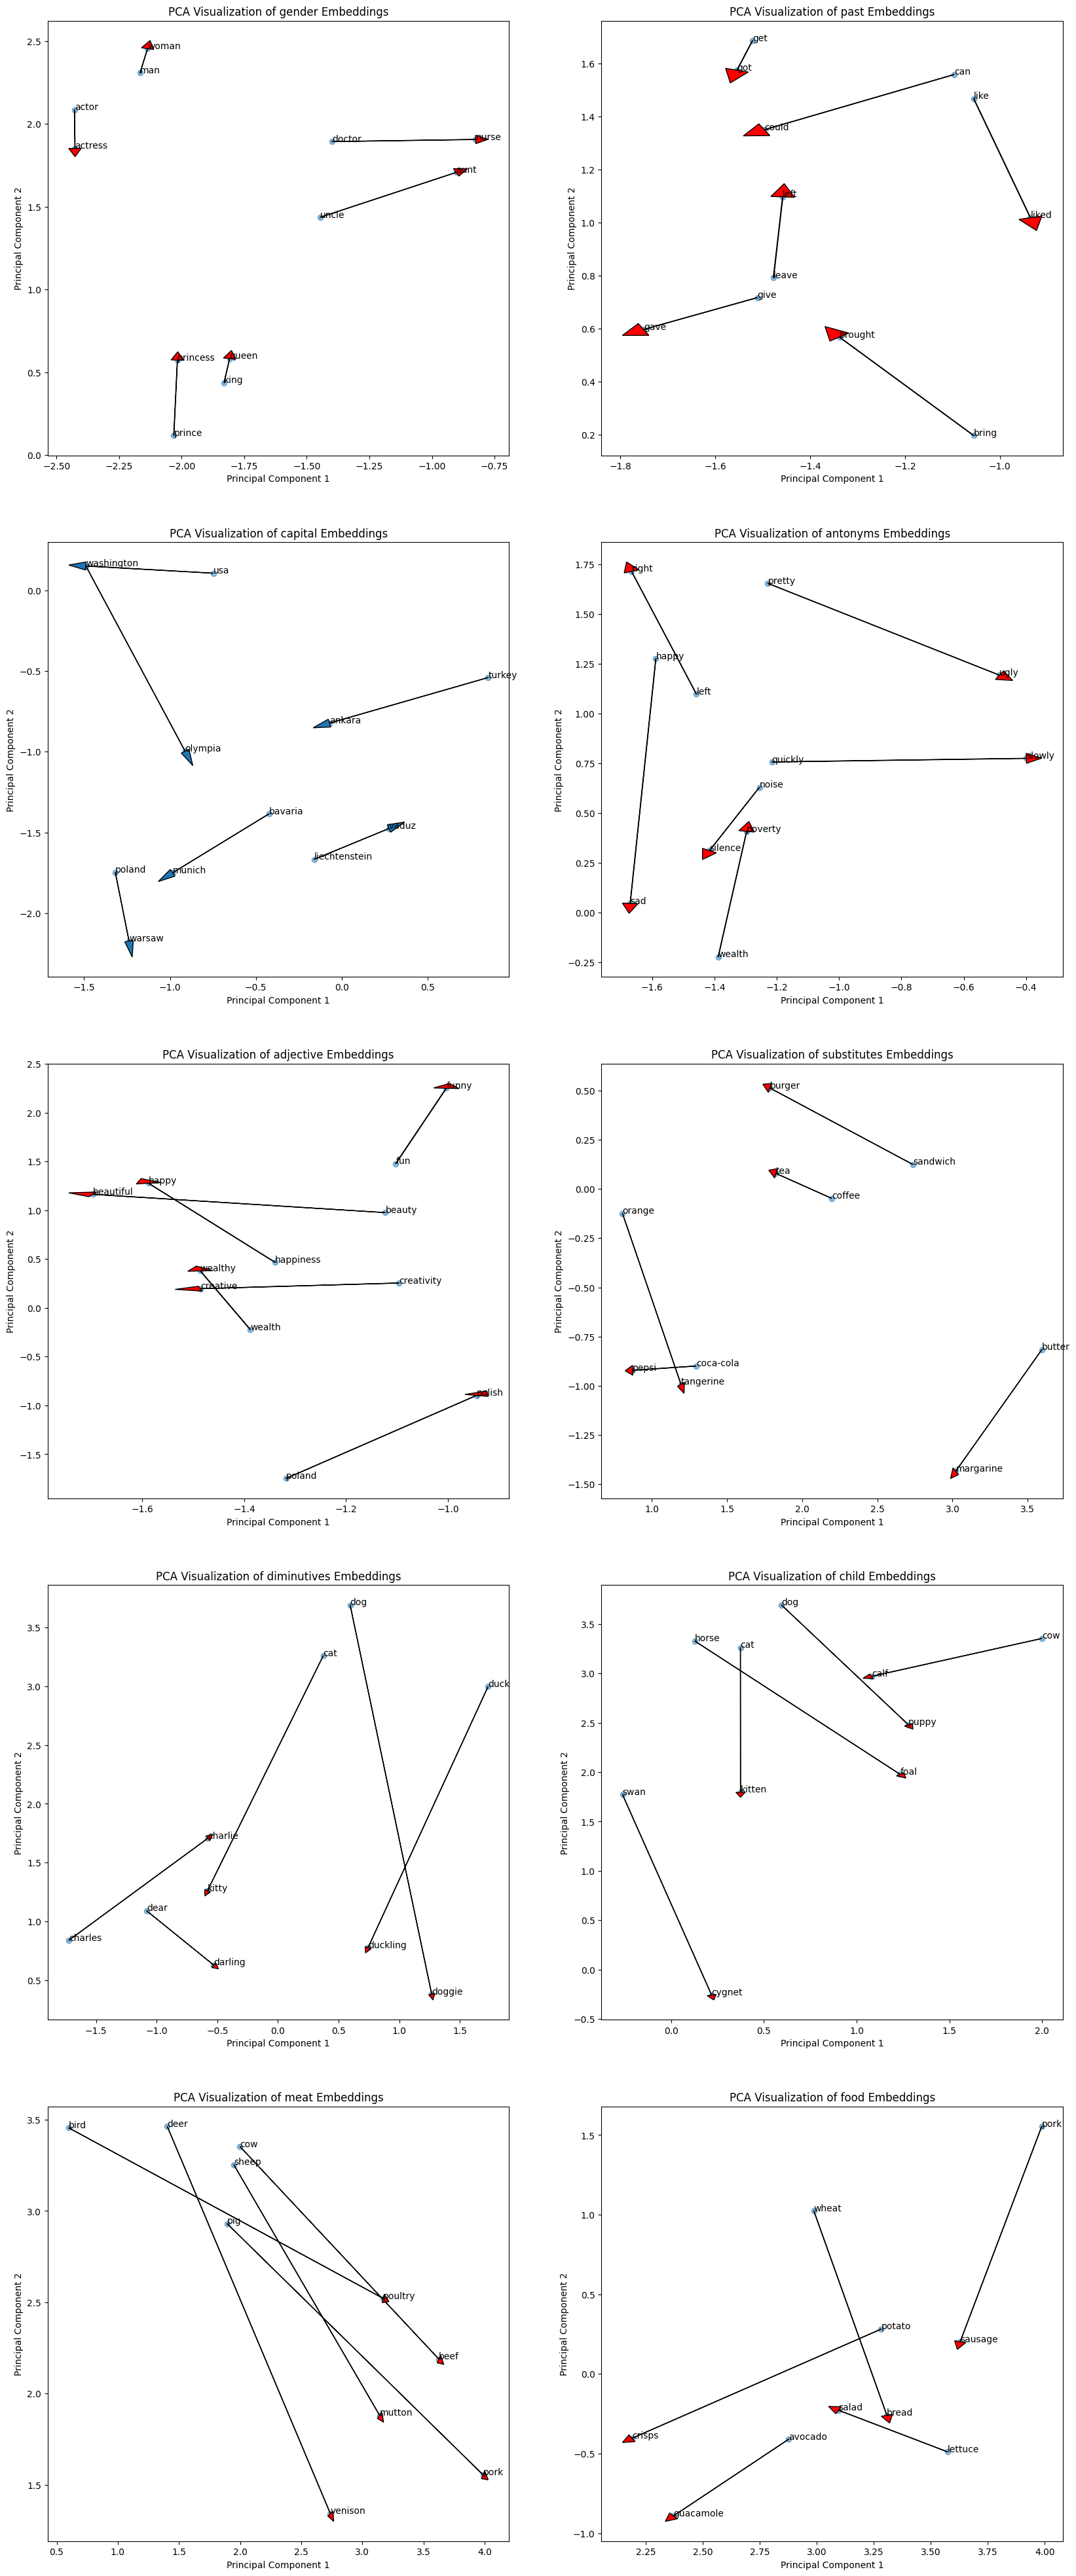

In [32]:
classes=['gender','past','capital','antonyms','adjective','substitutes','diminutives','child','meat','food']
word_vectors=[gender,past,capital,antonyms,adjective,substitutes,diminutives,child,meat,food]
vectors=[gender_vectors,past_vectors,capital_vectors,antonyms_vectors,adjective_vectors,substitutes_vectors,diminutives_vectors,child_vectors,meat_vectors,food_vectors]


plt.figure(figsize=(20, 50))
for i,clas in enumerate(classes):
  plt.subplot(5, 2, i+1)
  X_class=pca.transform(vectors[i])
  plt.scatter(X_class[:, 0], X_class[:, 1], alpha=0.5)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(f'PCA Visualization of {clas} Embeddings')
  for j, word in enumerate(word_vectors[i]):
    plt.annotate(word, (X_class[j, 0], X_class[j, 1]))
  if clas=='capital':
    plt.arrow(X_class[0,0],X_class[0,1],X_class[1,0]-X_class[0,0],X_class[1,1]-X_class[0,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[2,0],X_class[2,1],X_class[3,0]-X_class[2,0],X_class[3,1]-X_class[2,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[3,0],X_class[3,1],X_class[4,0]-X_class[3,0],X_class[4,1]-X_class[3,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[5,0],X_class[5,1],X_class[6,0]-X_class[5,0],X_class[6,1]-X_class[5,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[7,0],X_class[7,1],X_class[8,0]-X_class[7,0],X_class[8,1]-X_class[7,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[9,0],X_class[9,1],X_class[10,0]-X_class[9,0],X_class[10,1]-X_class[9,1],head_width=0.05, head_length=0.1)

  else:
    for j in range(len(word_vectors[i])//2):
      plt.arrow(X_class[2*j,0],X_class[2*j,1],X_class[2*j+1,0]-X_class[2*j,0],X_class[2*j+1,1]-X_class[2*j,1],head_width=0.05, head_length=0.05,fc='red', ec='black')

### Local PCA

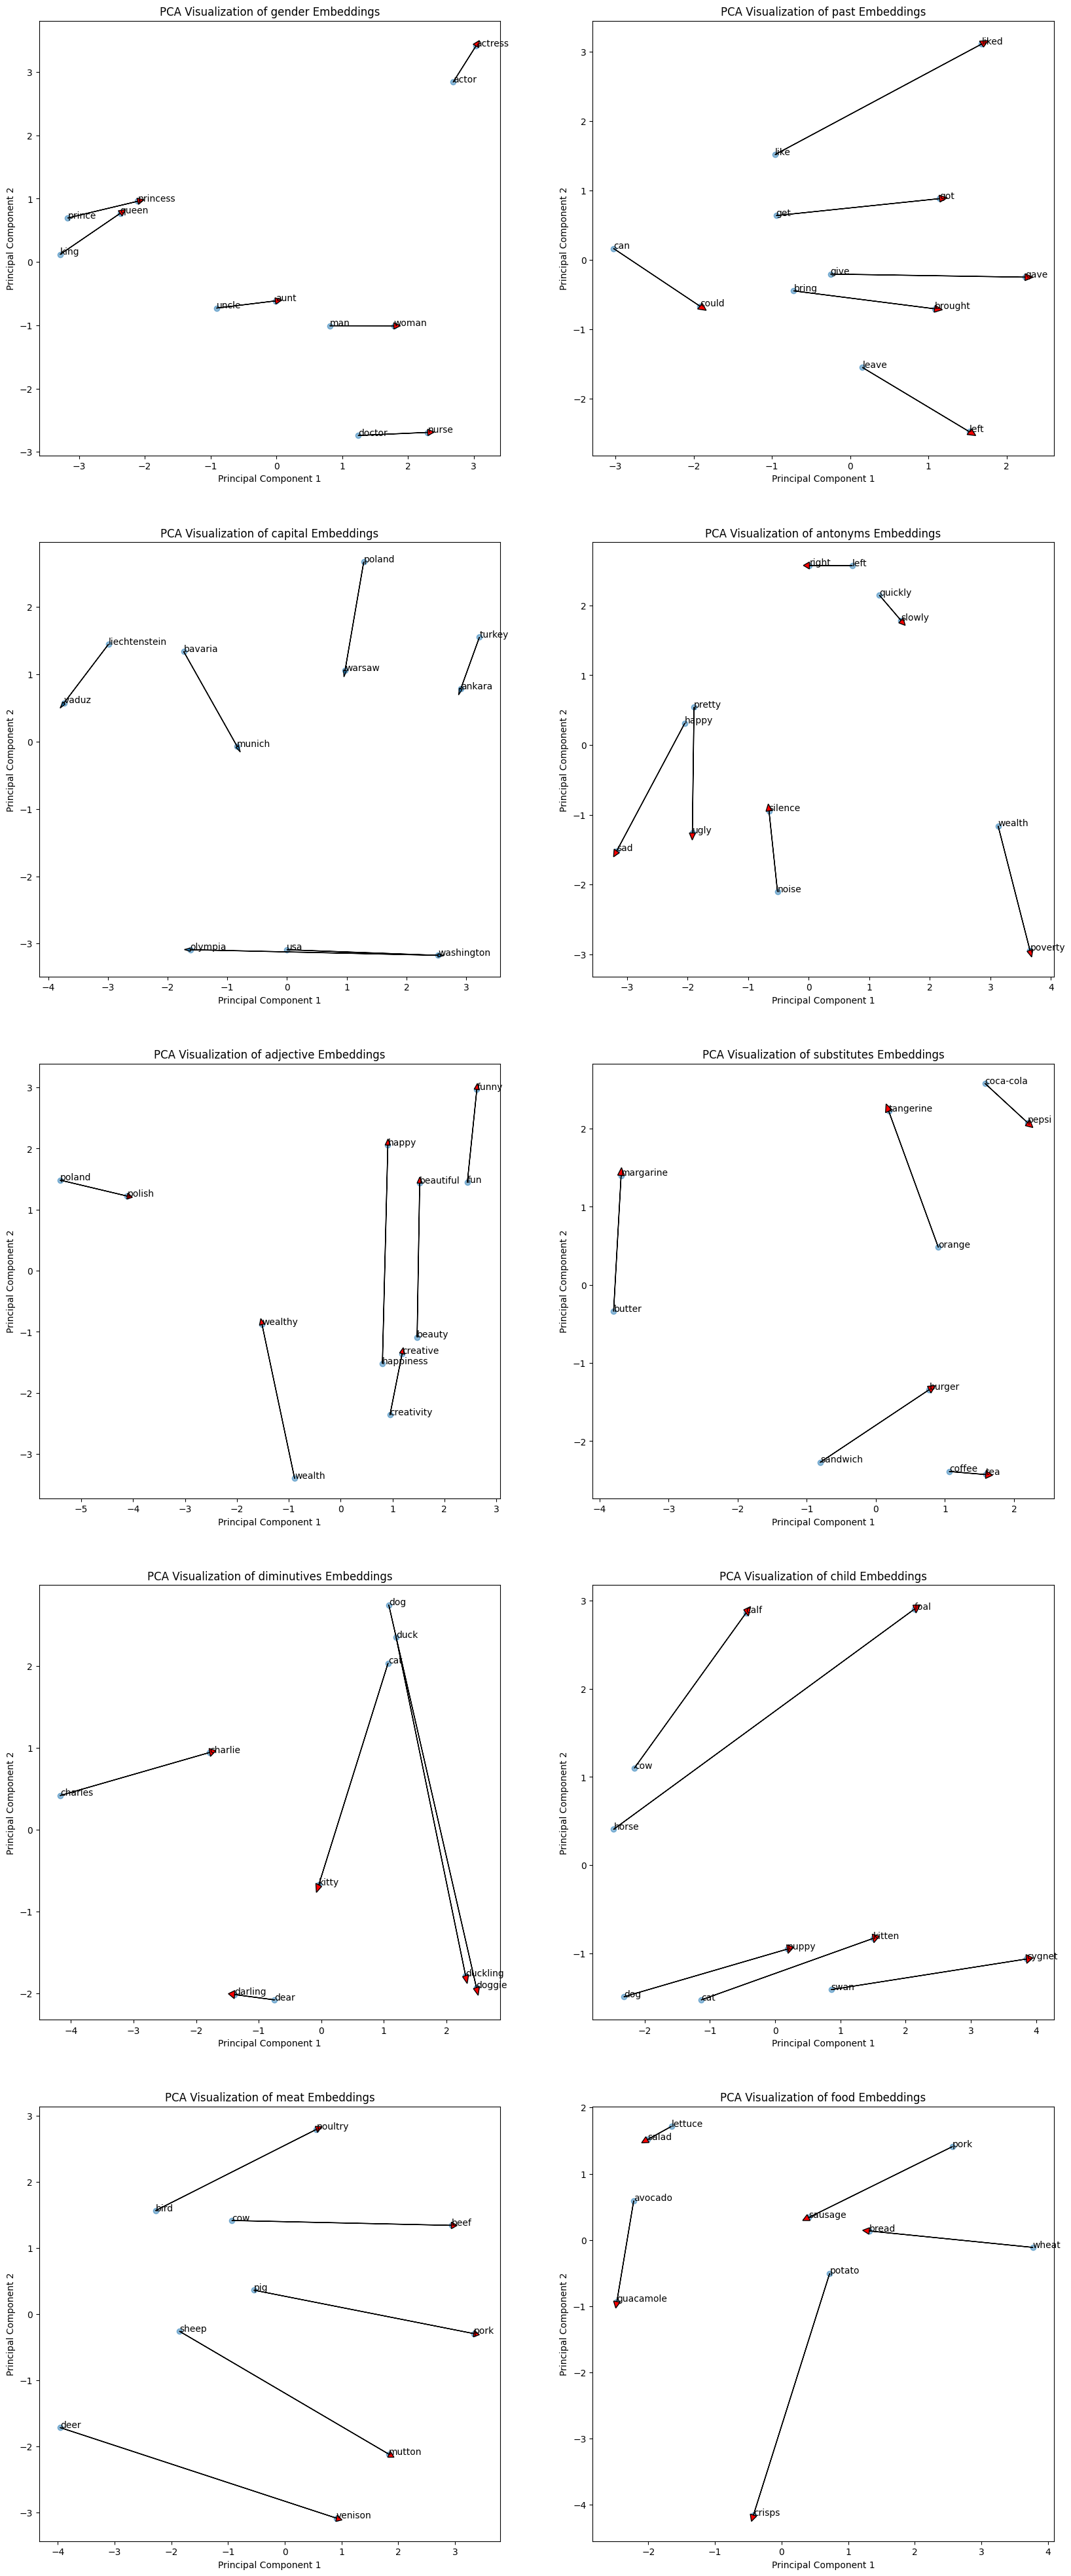

In [33]:
plt.figure(figsize=(20, 50))
for i,clas in enumerate(classes):
  plt.subplot(5, 2, i+1)
  pca_class = PCA(n_components=2)
  X_class=pca_class.fit_transform(vectors[i])
  plt.scatter(X_class[:, 0], X_class[:, 1], alpha=0.5)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(f'PCA Visualization of {clas} Embeddings')
  for j, word in enumerate(word_vectors[i]):
    plt.annotate(word, (X_class[j, 0], X_class[j, 1]))
  if clas=='capital':
    plt.arrow(X_class[0,0],X_class[0,1],X_class[1,0]-X_class[0,0],X_class[1,1]-X_class[0,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[2,0],X_class[2,1],X_class[3,0]-X_class[2,0],X_class[3,1]-X_class[2,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[3,0],X_class[3,1],X_class[4,0]-X_class[3,0],X_class[4,1]-X_class[3,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[5,0],X_class[5,1],X_class[6,0]-X_class[5,0],X_class[6,1]-X_class[5,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[7,0],X_class[7,1],X_class[8,0]-X_class[7,0],X_class[8,1]-X_class[7,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[9,0],X_class[9,1],X_class[10,0]-X_class[9,0],X_class[10,1]-X_class[9,1],head_width=0.05, head_length=0.1)

  else:
    for j in range(len(word_vectors[i])//2):
      plt.arrow(X_class[2*j,0],X_class[2*j,1],X_class[2*j+1,0]-X_class[2*j,0],X_class[2*j+1,1]-X_class[2*j,1],head_width=0.1, head_length=0.1,fc='red', ec='black')

In [9]:
gender_vector=model['woman']-model['man']
past_vector=model['present']-model['past']
capital_vector=model['capital']-model['country']
adjective_vector=model['adjective']-model['noun']
dimunitives_vector=model['small']-model['big']
child_vector=model['child']-model['parent']
meat_vector=model['meat']-model['animal']
food_vector=model['food']-model['ingredient']



In [ ]:
for i in range(len(gender_vectors[0])//2):
  print(gender[2*i],gender[2*i+1])
  print(model.most_similar(gender_vectors[2*i]+gender_vector,topn=10))

king queen
[('king', 0.8551837205886841), ('queen', 0.783441424369812), ('monarch', 0.6933801770210266), ('throne', 0.6833109855651855), ('daughter', 0.6809081435203552), ('prince', 0.6713141798973083), ('princess', 0.6644083261489868), ('mother', 0.6579325199127197), ('elizabeth', 0.6563301086425781), ('father', 0.6392418742179871)]
man woman
[('woman', 1.0), ('girl', 0.8472670912742615), ('man', 0.832349419593811), ('mother', 0.827568769454956), ('boy', 0.7720510363578796), ('she', 0.7632068395614624), ('child', 0.7601761817932129), ('wife', 0.7505022287368774), ('her', 0.7445706129074097), ('herself', 0.7426273822784424)]
doctor nurse
[('doctor', 0.8661208748817444), ('nurse', 0.7757077813148499), ('physician', 0.7128061652183533), ('woman', 0.7089030742645264), ('doctors', 0.6793617010116577), ('pregnant', 0.6787967681884766), ('patient', 0.6772217750549316), ('dentist', 0.6694242358207703), ('mother', 0.6586816310882568), ('medical', 0.6466937065124512)]
prince princess
[('prince'

In [ ]:
for i in range(len(past_vectors)//2):
  print(past[2*i],past[2*i+1])
  print(model.most_similar(past_vectors[2*i]+past_vector,topn=10))

bring brought
[('present', 0.7231049537658691), ('bring', 0.6868622899055481), ('create', 0.6554263830184937), ('provide', 0.6357153654098511), ('necessary', 0.6277086138725281), ('sufficient', 0.6177150011062622), ('seek', 0.6020115613937378), ('need', 0.5900527834892273), ('deliver', 0.5882444977760315), ('choose', 0.5859577655792236)]
get got
[('present', 0.7250797748565674), ('get', 0.7197944521903992), ('need', 0.7195255756378174), ('able', 0.7090843319892883), ('want', 0.7073065638542175), ('make', 0.6927472352981567), ('can', 0.6901878118515015), ('would', 0.6778104901313782), ('find', 0.6776657104492188), ('you', 0.6709792613983154)]
like liked
[('present', 0.7201600074768066), ('like', 0.7120807766914368), ('such', 0.6625012159347534), ('example', 0.6364446878433228), ('known', 0.6351368427276611), ('called', 0.625312864780426), ('is', 0.6213855147361755), ('include', 0.6210580468177795), ('besides', 0.6199546456336975), ('make', 0.6185799837112427)]
give gave
[('give', 0.7248

In [37]:
for i in range(len(past_vectors)//2):
  print('\n'+f' Using {past[2*i+1]} - {past[2*i]}:'+'\n')
  for j in range(len(past_vectors)//2):
    print(f'Change {past[2*j]} to {past[2*j+1]}')
    print(model.most_similar(past_vectors[2*j]+past_vectors[2*i+1]-past_vectors[2*i],topn=10))


 Using brought - bring:

Change bring to brought
[('brought', 1.0), ('came', 0.8401380777359009), ('turned', 0.8271397948265076), ('took', 0.7900792360305786), ('once', 0.788041353225708), ('had', 0.7796419262886047), ('saw', 0.7786809206008911), ('later', 0.7769205570220947), ('when', 0.7763797044754028), ('taken', 0.7710111737251282)]
Change get to got
[('got', 0.9028812050819397), ('get', 0.8447099328041077), ('getting', 0.8296300172805786), ('turned', 0.8110215067863464), ('went', 0.8077003359794617), ('had', 0.807079553604126), ('when', 0.8038589358329773), ('came', 0.802240252494812), ('out', 0.8006046414375305), ('having', 0.7958656549453735)]
Change like to liked
[('like', 0.8529794812202454), ('well', 0.72886723279953), ('as', 0.7265216708183289), ('turned', 0.7185492515563965), ('been', 0.7185426950454712), ('when', 0.7173624038696289), ('being', 0.7161021828651428), ('even', 0.7113471627235413), ('though', 0.7103396654129028), ('came', 0.7096777558326721)]
Change give to ga

In [ ]:
#capital

In [ ]:
#antonyms

for i in range(len(antonyms_vectors)//2):
  print(antonyms[2*i],antonyms[2*i+1])
  print(model.most_similar(antonyms_vectors[2*i]*(-1),topn=10))

pretty ugly
[('kd94', 0.5471188426017761), ('selbyville', 0.5449374914169312), ('pentwyn', 0.5386792421340942), ('quilpie', 0.5284827947616577), ('enolase', 0.5268262624740601), ('23aou94', 0.5252786874771118), ('gürsel', 0.5243732333183289), ('waroona', 0.5232250690460205), ('wimedia', 0.5191905498504639), ('thurii', 0.5173492431640625)]
happy sad
[('socionics', 0.5758118629455566), ('francheville', 0.5602913498878479), ('bb94', 0.5592160820960999), ('westendorf', 0.5574142932891846), ('darban', 0.5568150281906128), ('bhaktavatsalam', 0.5555770397186279), ('ink-jet', 0.553968071937561), ('malkawi', 0.5515477657318115), ('busybox', 0.5482651591300964), ('dhimitër', 0.5443779230117798)]
noise silence
[('trimbobler', 0.47693008184432983), ('evelin', 0.46587657928466797), ('karlene', 0.45962607860565186), ('samirah', 0.4595501124858856), ('nidhi', 0.45812711119651794), ('cherigat', 0.45424404740333557), ('cerniglia', 0.45051437616348267), ('kayce', 0.4503073990345001), ('bongartz', 0.4480

In [ ]:
#adjective

for i in range(len(adjective_vectors)//2):
  print(adjective[2*i],adjective[2*i+1])
  print(model.most_similar(adjective_vectors[2*i]+adjective_vector,topn=10))

poland polish
[('poland', 0.8923043608665466), ('hungary', 0.752764880657196), ('lithuania', 0.709567666053772), ('slovakia', 0.7032666802406311), ('romania', 0.6966661810874939), ('bulgaria', 0.6869820952415466), ('latvia', 0.6748311519622803), ('germany', 0.6688706278800964), ('ukraine', 0.6448163986206055), ('estonia', 0.6396497488021851)]
wealth wealthy
[('wealth', 0.8910636305809021), ('riches', 0.6854625344276428), ('fortune', 0.6429024338722229), ('vast', 0.5868434309959412), ('immense', 0.575678288936615), ('money', 0.5747772455215454), ('windfall', 0.5718308091163635), ('rich', 0.564811110496521), ('enormous', 0.5623826384544373), ('resources', 0.5595318675041199)]
happiness happy
[('happiness', 0.8495827317237854), ('warmth', 0.6484042406082153), ('goodness', 0.6143119931221008), ('compassion', 0.6106488108634949), ('longing', 0.6102469563484192), ('generosity', 0.6071082949638367), ('love', 0.6066898107528687), ('joy', 0.6006597280502319), ('yearning', 0.5979598760604858), (

In [ ]:
for i in range(len(adjective_vectors)//2):
  print('\n'+f' Using {adjective[2*i+1]} - {adjective[2*i]}:'+'\n')
  for j in range(len(adjective_vectors)//2):
    print(f'Change {adjective[2*j]} to {adjective[2*j+1]}')
    print(model.most_similar(adjective_vectors[2*j]+adjective_vectors[2*i+1]-adjective_vectors[2*i],topn=10))

polish - poland 

poland polish
[('polish', 1.0000001192092896), ('hungarian', 0.811542809009552), ('german', 0.7649590373039246), ('slovak', 0.7618729472160339), ('romanian', 0.7563192248344421), ('lithuanian', 0.7509332895278931), ('ukrainian', 0.728965699672699), ('bulgarian', 0.7193332314491272), ('austrian', 0.694527804851532), ('poland', 0.6944575905799866)]
wealth wealthy
[('wealth', 0.7406835556030273), ('fortune', 0.5760840177536011), ('riches', 0.5209709405899048), ('intellectual', 0.4932236671447754), ('knowledge', 0.49106237292289734), ('personal', 0.4891464114189148), ('aristocratic', 0.4726822078227997), ('corporate', 0.47168391942977905), ('money', 0.4645936191082001), ('vast', 0.4619288146495819)]
happiness happy
[('happiness', 0.7363398671150208), ('joy', 0.5467893481254578), ('passion', 0.5197576880455017), ('spirit', 0.5150960087776184), ('love', 0.5144824981689453), ('contentment', 0.5118334889411926), ('enjoyment', 0.5108417272567749), ('lust', 0.501955509185791), 

In [39]:
# substitutes

for j in range(len(substitutes_vectors)):
  print(f'Check similar words of {substitutes[j]}')
  print(model.most_similar(substitutes_vectors[j],topn=10))


Check similar words of orange
[('orange', 1.0), ('yellow', 0.7358633279800415), ('red', 0.7140780091285706), ('blue', 0.7118036150932312), ('green', 0.7111418843269348), ('pink', 0.677507221698761), ('purple', 0.6774231791496277), ('black', 0.6709616780281067), ('colored', 0.665260910987854), ('lemon', 0.6251963973045349)]
Check similar words of tangerine
[('tangerine', 1.0000001192092896), ('sherbet', 0.6452572345733643), ('peach', 0.6425716876983643), ('raspberry', 0.6080781817436218), ('poinsettia', 0.5990670919418335), ('pineapple', 0.5966379642486572), ('apricot', 0.5955897569656372), ('glo', 0.591403067111969), ('watermelon', 0.5913028717041016), ('grapefruit', 0.5800862312316895)]
Check similar words of butter
[('butter', 0.9999999403953552), ('margarine', 0.8079419136047363), ('cream', 0.7990189790725708), ('peanut', 0.7813066840171814), ('cheese', 0.7791200876235962), ('chocolate', 0.7580447196960449), ('melted', 0.7524645328521729), ('flour', 0.7519240379333496), ('sauce', 0.

In [ ]:
#dimunitives

for i in range(len(diminutives_vectors)//2):
  print(f'Change {diminutives[2*i]} to {diminutives[2*i+1]}')
  print(model.most_similar(diminutives_vectors[2*i]+dimunitives_vector,topn=10))


Change dear to darling
[('dear', 0.7370997071266174), ('caring', 0.46264228224754333), ('lonely', 0.449621319770813), ('bereaved', 0.4489692151546478), ('mother', 0.4394547641277313), ('parents', 0.43174657225608826), ('deceased', 0.43101078271865845), ('small', 0.4299761950969696), ('grandmother', 0.4276769161224365), ('letters', 0.4260483980178833)]
Change charles to charlie
[('charles', 0.7881715297698975), ('william', 0.6957456469535828), ('edward', 0.6774432063102722), ('henry', 0.6164492964744568), ('frederick', 0.6104615330696106), ('francis', 0.5938205718994141), ('joseph', 0.5792205929756165), ('c.', 0.5530174374580383), ('sir', 0.5517600178718567), ('elizabeth', 0.5434595346450806)]
Change duck to duckling
[('duck', 0.7829766273498535), ('chicken', 0.5507340431213379), ('pheasant', 0.5316044092178345), ('rabbit', 0.5285492539405823), ('goose', 0.5226167440414429), ('small', 0.513678252696991), ('deer', 0.5102571845054626), ('pig', 0.5098735690116882), ('goat', 0.5098140239715

In [36]:
for i in range(len(diminutives_vectors)//2):
  print('\n'+f' Using {diminutives[2*i+1]} - {diminutives[2*i]}:'+'\n')
  for j in range(len(diminutives_vectors)//2):
    print(f'Change {diminutives[2*j]} to {diminutives[2*j+1]}')
    print(model.most_similar(diminutives_vectors[2*j]+diminutives_vectors[2*i+1]-diminutives_vectors[2*i],topn=10))


 Using darling - dear:

Change dear to darling
[('darling', 1.0), ('alistair', 0.577861487865448), ('exchequer', 0.5250748991966248), ('osborne', 0.5189896821975708), ('hawke', 0.4881598651409149), ('fraser', 0.4822210967540741), ('thatcher', 0.4759894013404846), ('lloyd', 0.47315287590026855), ('tory', 0.47166603803634644), ('margaret', 0.47108080983161926)]
Change charles to charlie
[('charles', 0.7031156420707703), ('albert', 0.6268576979637146), ('lloyd', 0.5941683053970337), ('edward', 0.5814885497093201), ('henry', 0.5779808163642883), ('bernard', 0.5758619904518127), ('william', 0.5687486529350281), ('george', 0.5605726838111877), ('lawrence', 0.55124431848526), ('osborne', 0.5472611784934998)]
Change duck to duckling
[('duck', 0.7020393013954163), ('swan', 0.5225489139556885), ('goose', 0.5003969073295593), ('rabbit', 0.49270009994506836), ('darling', 0.4820712208747864), ('salmon', 0.4810483753681183), ('daffy', 0.4543500244617462), ('alistair', 0.454339861869812), ('feather'

In [ ]:
#child

for i in range(len(child_vectors)//2):
  print(f'Change {child[2*i]} to {child[2*i+1]}')
  print(model.most_similar(child_vectors[2*i]+child_vector,topn=10))


Change dog to puppy
[('dog', 0.7784432172775269), ('dogs', 0.6999659538269043), ('cat', 0.6850985884666443), ('boy', 0.6845086216926575), ('child', 0.6817147731781006), ('girl', 0.6294177770614624), ('elephant', 0.6147021055221558), ('baby', 0.6116083264350891), ('animal', 0.6044569611549377), ('man', 0.5837820172309875)]
Change cow to calf
[('cow', 0.794708251953125), ('pigs', 0.6280363202095032), ('pig', 0.6234784722328186), ('cows', 0.6224162578582764), ('child', 0.6159831285476685), ('mad', 0.6126900315284729), ('elephant', 0.6095672249794006), ('sheep', 0.6090626120567322), ('bovine', 0.582335352897644), ('babies', 0.5755884051322937)]
Change cat to kitten
[('cat', 0.7402186989784241), ('dog', 0.6816492676734924), ('boy', 0.6643068194389343), ('child', 0.660688579082489), ('elephant', 0.6584025025367737), ('girl', 0.6342965960502625), ('baby', 0.6338208317756653), ('monkey', 0.6131404042243958), ('dogs', 0.6115187406539917), ('cats', 0.6090139746665955)]
Change horse to foal
[('ho

In [35]:
for i in range(len(child_vectors)//2):
  print('\n'+f' Using {child[2*i+1]} - {child[2*i]}:'+'\n')
  for j in range(len(child_vectors)//2):
    print(f'Change {child[2*j]} to {child[2*j+1]}')
    print(model.most_similar(child_vectors[2*j]+child_vectors[2*i+1]-child_vectors[2*i],topn=10))


 Using puppy - dog:

Change dog to puppy
[('puppy', 0.9999998807907104), ('puppies', 0.7518181800842285), ('dog', 0.7236376404762268), ('kitten', 0.6905401945114136), ('retriever', 0.6884320378303528), ('cat', 0.6800068616867065), ('hound', 0.6328635215759277), ('rottweiler', 0.6270608901977539), ('pug', 0.6259523630142212), ('kittens', 0.6209099888801575)]
Change cow to calf
[('cow', 0.7794526219367981), ('bovine', 0.6673515439033508), ('cows', 0.6373140215873718), ('puppy', 0.599510133266449), ('cloned', 0.5959019660949707), ('pig', 0.5921223759651184), ('encephalopathy', 0.5915902853012085), ('spongiform', 0.5773907899856567), ('calves', 0.5748453736305237), ('holstein', 0.5719450116157532)]
Change cat to kitten
[('puppy', 0.8447952270507812), ('cat', 0.6820927858352661), ('kitten', 0.6617627739906311), ('puppies', 0.651216447353363), ('kittens', 0.6242956519126892), ('tabby', 0.5941992998123169), ('pup', 0.5865667462348938), ('monkey', 0.5784133076667786), ('rabbit', 0.57110548019

In [10]:
# meat

for i in range(len(meat_vectors)//2):
  print(f'Change {meat[2*i]} to {meat[2*i+1]}')
  print(model.most_similar(meat_vectors[2*i]+meat_vector,topn=10))

Change pig to pork
[('meat', 0.7985683679580688), ('chicken', 0.7855547666549683), ('pork', 0.7819194793701172), ('pig', 0.7452653050422668), ('beef', 0.7383213639259338), ('veal', 0.7334141731262207), ('roast', 0.7271203398704529), ('sausage', 0.7194576859474182), ('mutton', 0.6988295912742615), ('lamb', 0.6928051710128784)]
Change cow to beef
[('beef', 0.813454806804657), ('meat', 0.8045406937599182), ('cow', 0.782356858253479), ('pork', 0.75719153881073), ('chicken', 0.7307661175727844), ('veal', 0.6808080077171326), ('milk', 0.674793541431427), ('sausage', 0.6709014773368835), ('goat', 0.6653285622596741), ('lamb', 0.6618902683258057)]
Change sheep to mutton
[('meat', 0.7778586149215698), ('sheep', 0.7497459053993225), ('goat', 0.7369892001152039), ('beef', 0.7367450594902039), ('pork', 0.6951167583465576), ('mutton', 0.6917521953582764), ('chicken', 0.6856480240821838), ('cows', 0.6806537508964539), ('veal', 0.6761608123779297), ('cattle', 0.6673012971878052)]
Change deer to venis

In [17]:
for i in range(len(meat_vectors)//2):
  print('\n'+f' Using {meat[2*i+1]} - {meat[2*i]}:'+'\n')
  for j in range(len(meat_vectors)//2):
    print(f'Change {meat[2*j]} to {meat[2*j+1]}')
    print(model.most_similar(meat_vectors[2*j]+meat_vectors[2*i+1]-meat_vectors[2*i],topn=10))


 Using pork - pig:

Change pig to pork
[('pork', 1.0000001192092896), ('beef', 0.8293679356575012), ('meat', 0.8260456323623657), ('chicken', 0.7934611439704895), ('veal', 0.7191457748413086), ('mutton', 0.7156654000282288), ('sausage', 0.7073134183883667), ('roast', 0.7011784911155701), ('sausages', 0.6947694420814514), ('lamb', 0.6794514060020447)]
Change cow to beef
[('pork', 0.8610179424285889), ('beef', 0.8240714073181152), ('meat', 0.7509027123451233), ('cow', 0.7259153723716736), ('chicken', 0.6571729779243469), ('poultry', 0.6312862634658813), ('meats', 0.6024733781814575), ('dairy', 0.6022456884384155), ('sausages', 0.6003157496452332), ('veal', 0.5939934253692627)]
Change sheep to mutton
[('pork', 0.81719571352005), ('beef', 0.7575615644454956), ('meat', 0.7344399690628052), ('cattle', 0.7032448649406433), ('sheep', 0.6798458695411682), ('livestock', 0.6642935872077942), ('vegetables', 0.6509768962860107), ('mutton', 0.6484881639480591), ('meats', 0.6469858884811401), ('goat

In [16]:
# food
for i in range(len(food_vectors)//2):
  print(f'Change {food[2*i]} to {food[2*i+1]}')
  print(model.most_similar(food_vectors[2*i]+food_vector,topn=10))

Change potato to chips
[('potato', 0.7323490977287292), ('food', 0.7155079245567322), ('bread', 0.6759360432624817), ('peanut', 0.610477089881897), ('meat', 0.5976564884185791), ('fish', 0.5971211194992065), ('chicken', 0.595909833908081), ('eat', 0.590911865234375), ('fried', 0.5905067920684814), ('rice', 0.587465763092041)]
Change lettuce to salad
[('lettuce', 0.7425440549850464), ('spinach', 0.6123543977737427), ('vegetables', 0.6097822785377502), ('food', 0.5953406691551208), ('bread', 0.5772382020950317), ('salad', 0.5674078464508057), ('sandwiches', 0.5613700151443481), ('cabbage', 0.5596166849136353), ('meat', 0.5440875887870789), ('arugula', 0.5415576100349426)]
Change pork to chop
[('pork', 0.7863724231719971), ('food', 0.7406613230705261), ('meat', 0.7365811467170715), ('beef', 0.7047497630119324), ('chicken', 0.6867573857307434), ('poultry', 0.6456894874572754), ('seafood', 0.6110902428627014), ('livestock', 0.6015315055847168), ('lamb', 0.5855717658996582), ('imports', 0.58

In [34]:
for i in range(len(food_vectors)//2):
  print('\n'+f' Using {food[2*i+1]} - {food[2*i]}:'+'\n')
  for j in range(len(food_vectors)//2):
    print(f'Change {food[2*j]} to {food[2*j+1]}')
    print(model.most_similar(food_vectors[2*j]+food_vectors[2*i+1]-food_vectors[2*i],topn=10))


 Using crisps - potato:

Change potato to crisps
[('crisps', 1.0000001192092896), ('muffins', 0.612870454788208), ('crackers', 0.6036905646324158), ('pretzels', 0.5857247114181519), ('cobblers', 0.5795359015464783), ('croissants', 0.5758850574493408), ('scones', 0.5673285722732544), ('bagels', 0.5673263072967529), ('pita', 0.5425886511802673), ('oatmeal', 0.5397460460662842)]
Change lettuce to salad
[('lettuce', 0.6595972776412964), ('watercress', 0.5860715508460999), ('radicchio', 0.5836977362632751), ('romaine', 0.5800729393959045), ('arugula', 0.5688925981521606), ('lettuces', 0.5665631890296936), ('crisps', 0.5523663759231567), ('frisee', 0.5074134469032288), ('radishes', 0.5036829710006714), ('garnished', 0.4987395107746124)]
Change pork to sausage
[('pork', 0.6641526222229004), ('mutton', 0.6158816814422607), ('sausages', 0.5538786053657532), ('offal', 0.5397240519523621), ('beef', 0.5362945795059204), ('carnitas', 0.5055046081542969), ('meats', 0.5033453702926636), ('veal', 0.4